In [197]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Import All Library

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans,DBSCAN

from yellowbrick.cluster import KElbow,KElbowVisualizer,SilhouetteVisualizer,ClusteringScoreVisualizer
from sklearn.metrics import silhouette_score
from imblearn.over_sampling import SMOTE


In [199]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## Exploratory Data Analysis

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [201]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [202]:
for col in df.columns:
    num = df[col].nunique()
    print(f"{col} >> Unique Value:{num}")
    print(df[col].value_counts())
    print("-------------------------------------")

ID >> Unique Value:2240
5524    1
6885    1
3478    1
7494    1
1763    1
       ..
5682    1
5564    1
6516    1
6255    1
9405    1
Name: ID, Length: 2240, dtype: int64
-------------------------------------
Year_Birth >> Unique Value:59
1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: Year_Birth, dtype: int64
-------------------------------------
Education >> Unique Value:5
Graduation    1

In [203]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [204]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

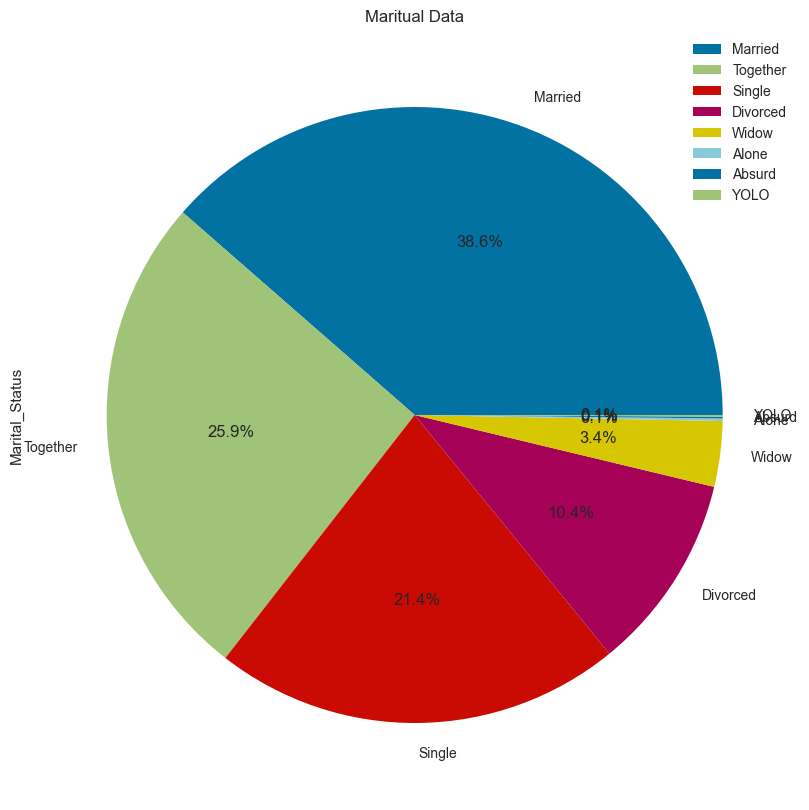

In [205]:
plt.figure(figsize=(10,10))
df['Marital_Status'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.title("Maritual Data")
plt.legend()
plt.show()

In [206]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [207]:
age = []
for i in df['Year_Birth']:
    age.append(2000-i)

In [208]:
df.insert(2,'Age',age)

In [209]:
df.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,43,Graduation,Single,58138.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,46,Graduation,Single,46344.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,35,Graduation,Together,71613.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,16,Graduation,Together,26646.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,19,PhD,Married,58293.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


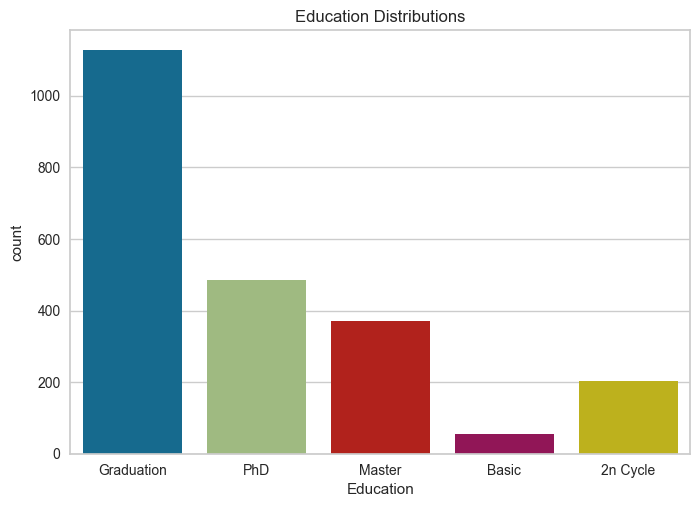

In [210]:
sns.countplot(x=df['Education'])
plt.title("Education Distributions")
plt.show()

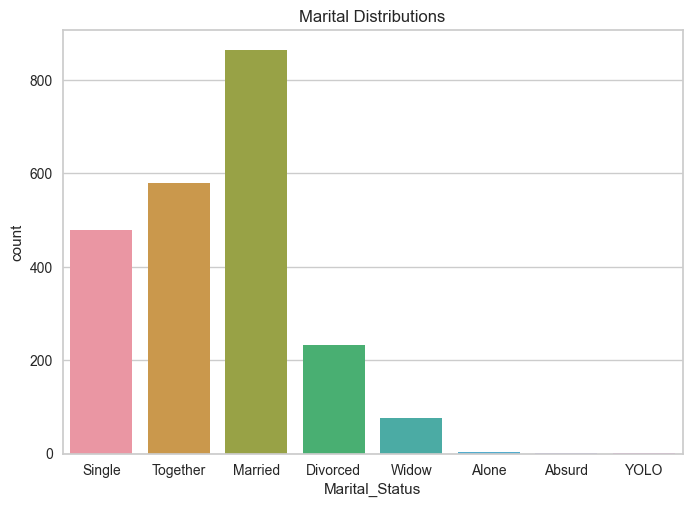

In [211]:
sns.countplot(x=df['Marital_Status'])
plt.title("Marital Distributions")
plt.show()

## Handling categorical Data

In [212]:
# One hot encoding
# Ordinal Encoding

In [213]:
marital_data = pd.get_dummies(df['Marital_Status'],prefix="Marital_Status",dtype=int)
marital_data

,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
2235,0,0,0,1,0,0,0,0
2236,0,0,0,0,0,1,0,0
2237,0,0,1,0,0,0,0,0
2238,0,0,0,0,0,1,0,0


In [214]:
df['Education'].unique().tolist()

['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle']

In [215]:
oe = OrdinalEncoder(categories=[['Basic', '2n Cycle','Graduation', 'Master', 'PhD']])
df[['Education']] = oe.fit_transform(df[['Education']])

In [216]:
oe.categories_

[array(['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], dtype=object)]

In [217]:
df = df.drop(['ID','Year_Birth','Marital_Status'],axis=1)
df

,Age,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,43,2.0,58138.0,0,0,04-09-2012,58,635,88,546,...,7,0,0,0,0,0,0,3,11,1
1,46,2.0,46344.0,1,1,08-03-2014,38,11,1,6,...,5,0,0,0,0,0,0,3,11,0
2,35,2.0,71613.0,0,0,21-08-2013,26,426,49,127,...,4,0,0,0,0,0,0,3,11,0
3,16,2.0,26646.0,1,0,10-02-2014,26,11,4,20,...,6,0,0,0,0,0,0,3,11,0
4,19,4.0,58293.0,1,0,19-01-2014,94,173,43,118,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,33,2.0,61223.0,0,1,13-06-2013,46,709,43,182,...,5,0,0,0,0,0,0,3,11,0
2236,54,4.0,64014.0,2,1,10-06-2014,56,406,0,30,...,7,0,0,0,1,0,0,3,11,0
2237,19,2.0,56981.0,0,0,25-01-2014,91,908,48,217,...,6,0,1,0,0,0,0,3,11,0
2238,44,3.0,69245.0,0,1,24-01-2014,8,428,30,214,...,3,0,0,0,0,0,0,3,11,0


In [218]:
df1 = pd.concat([df,marital_data],axis=1)
df1

,Age,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Z_Revenue,Response,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,43,2.0,58138.0,0,0,04-09-2012,58,635,88,546,...,11,1,0,0,0,0,1,0,0,0
1,46,2.0,46344.0,1,1,08-03-2014,38,11,1,6,...,11,0,0,0,0,0,1,0,0,0
2,35,2.0,71613.0,0,0,21-08-2013,26,426,49,127,...,11,0,0,0,0,0,0,1,0,0
3,16,2.0,26646.0,1,0,10-02-2014,26,11,4,20,...,11,0,0,0,0,0,0,1,0,0
4,19,4.0,58293.0,1,0,19-01-2014,94,173,43,118,...,11,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,33,2.0,61223.0,0,1,13-06-2013,46,709,43,182,...,11,0,0,0,0,1,0,0,0,0
2236,54,4.0,64014.0,2,1,10-06-2014,56,406,0,30,...,11,0,0,0,0,0,0,1,0,0
2237,19,2.0,56981.0,0,0,25-01-2014,91,908,48,217,...,11,0,0,0,1,0,0,0,0,0
2238,44,3.0,69245.0,0,1,24-01-2014,8,428,30,214,...,11,0,0,0,0,0,0,1,0,0


## Handling Missing Data

In [219]:
df1['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [220]:
print(df1['Income'].min())
print(df1['Income'].max())
print(df1['Income'].mean())
print(df1['Income'].median())
print(df1['Income'].mode()[0])

1730.0
666666.0
52247.25135379061
51381.5
7500.0


In [221]:
df1['Income'] = df1['Income'].fillna(df1['Income'].mean())

In [222]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      2240 non-null   int64  
 1   Education                2240 non-null   float64
 2   Income                   2240 non-null   float64
 3   Kidhome                  2240 non-null   int64  
 4   Teenhome                 2240 non-null   int64  
 5   Dt_Customer              2240 non-null   object 
 6   Recency                  2240 non-null   int64  
 7   MntWines                 2240 non-null   int64  
 8   MntFruits                2240 non-null   int64  
 9   MntMeatProducts          2240 non-null   int64  
 10  MntFishProducts          2240 non-null   int64  
 11  MntSweetProducts         2240 non-null   int64  
 12  MntGoldProds             2240 non-null   int64  
 13  NumDealsPurchases        2240 non-null   int64  
 14  NumWebPurchases         

In [223]:
df1['Dt_Customer'] = pd.to_datetime(df1['Dt_Customer'],format="%d-%m-%Y")

In [224]:
df1['Dt_Customer']

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [225]:
df1.head()

,Age,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Z_Revenue,Response,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,43,2.0,58138.0,0,0,2012-09-04,58,635,88,546,...,11,1,0,0,0,0,1,0,0,0
1,46,2.0,46344.0,1,1,2014-03-08,38,11,1,6,...,11,0,0,0,0,0,1,0,0,0
2,35,2.0,71613.0,0,0,2013-08-21,26,426,49,127,...,11,0,0,0,0,0,0,1,0,0
3,16,2.0,26646.0,1,0,2014-02-10,26,11,4,20,...,11,0,0,0,0,0,0,1,0,0
4,19,4.0,58293.0,1,0,2014-01-19,94,173,43,118,...,11,0,0,0,0,1,0,0,0,0


In [226]:
df1['Dt_Customer'].dt.month

0        9
1        3
2        8
3        2
4        1
        ..
2235     6
2236     6
2237     1
2238     1
2239    10
Name: Dt_Customer, Length: 2240, dtype: int64

In [227]:
df1['Day'] = df1['Dt_Customer'].dt.day
df1['Year'] = df1['Dt_Customer'].dt.year
df1['Month'] = df1['Dt_Customer'].dt.month

In [228]:
df1 = df1.drop('Dt_Customer',axis=1)
df1

,Age,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Day,Year,Month
0,43,2.0,58138.0,0,0,58,635,88,546,172,...,0,0,0,1,0,0,0,4,2012,9
1,46,2.0,46344.0,1,1,38,11,1,6,2,...,0,0,0,1,0,0,0,8,2014,3
2,35,2.0,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,1,0,0,21,2013,8
3,16,2.0,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,1,0,0,10,2014,2
4,19,4.0,58293.0,1,0,94,173,43,118,46,...,0,0,1,0,0,0,0,19,2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,33,2.0,61223.0,0,1,46,709,43,182,42,...,0,0,1,0,0,0,0,13,2013,6
2236,54,4.0,64014.0,2,1,56,406,0,30,0,...,0,0,0,0,1,0,0,10,2014,6
2237,19,2.0,56981.0,0,0,91,908,48,217,32,...,0,1,0,0,0,0,0,25,2014,1
2238,44,3.0,69245.0,0,1,8,428,30,214,80,...,0,0,0,0,1,0,0,24,2014,1


## Normal Distributions of Data

In [229]:
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm

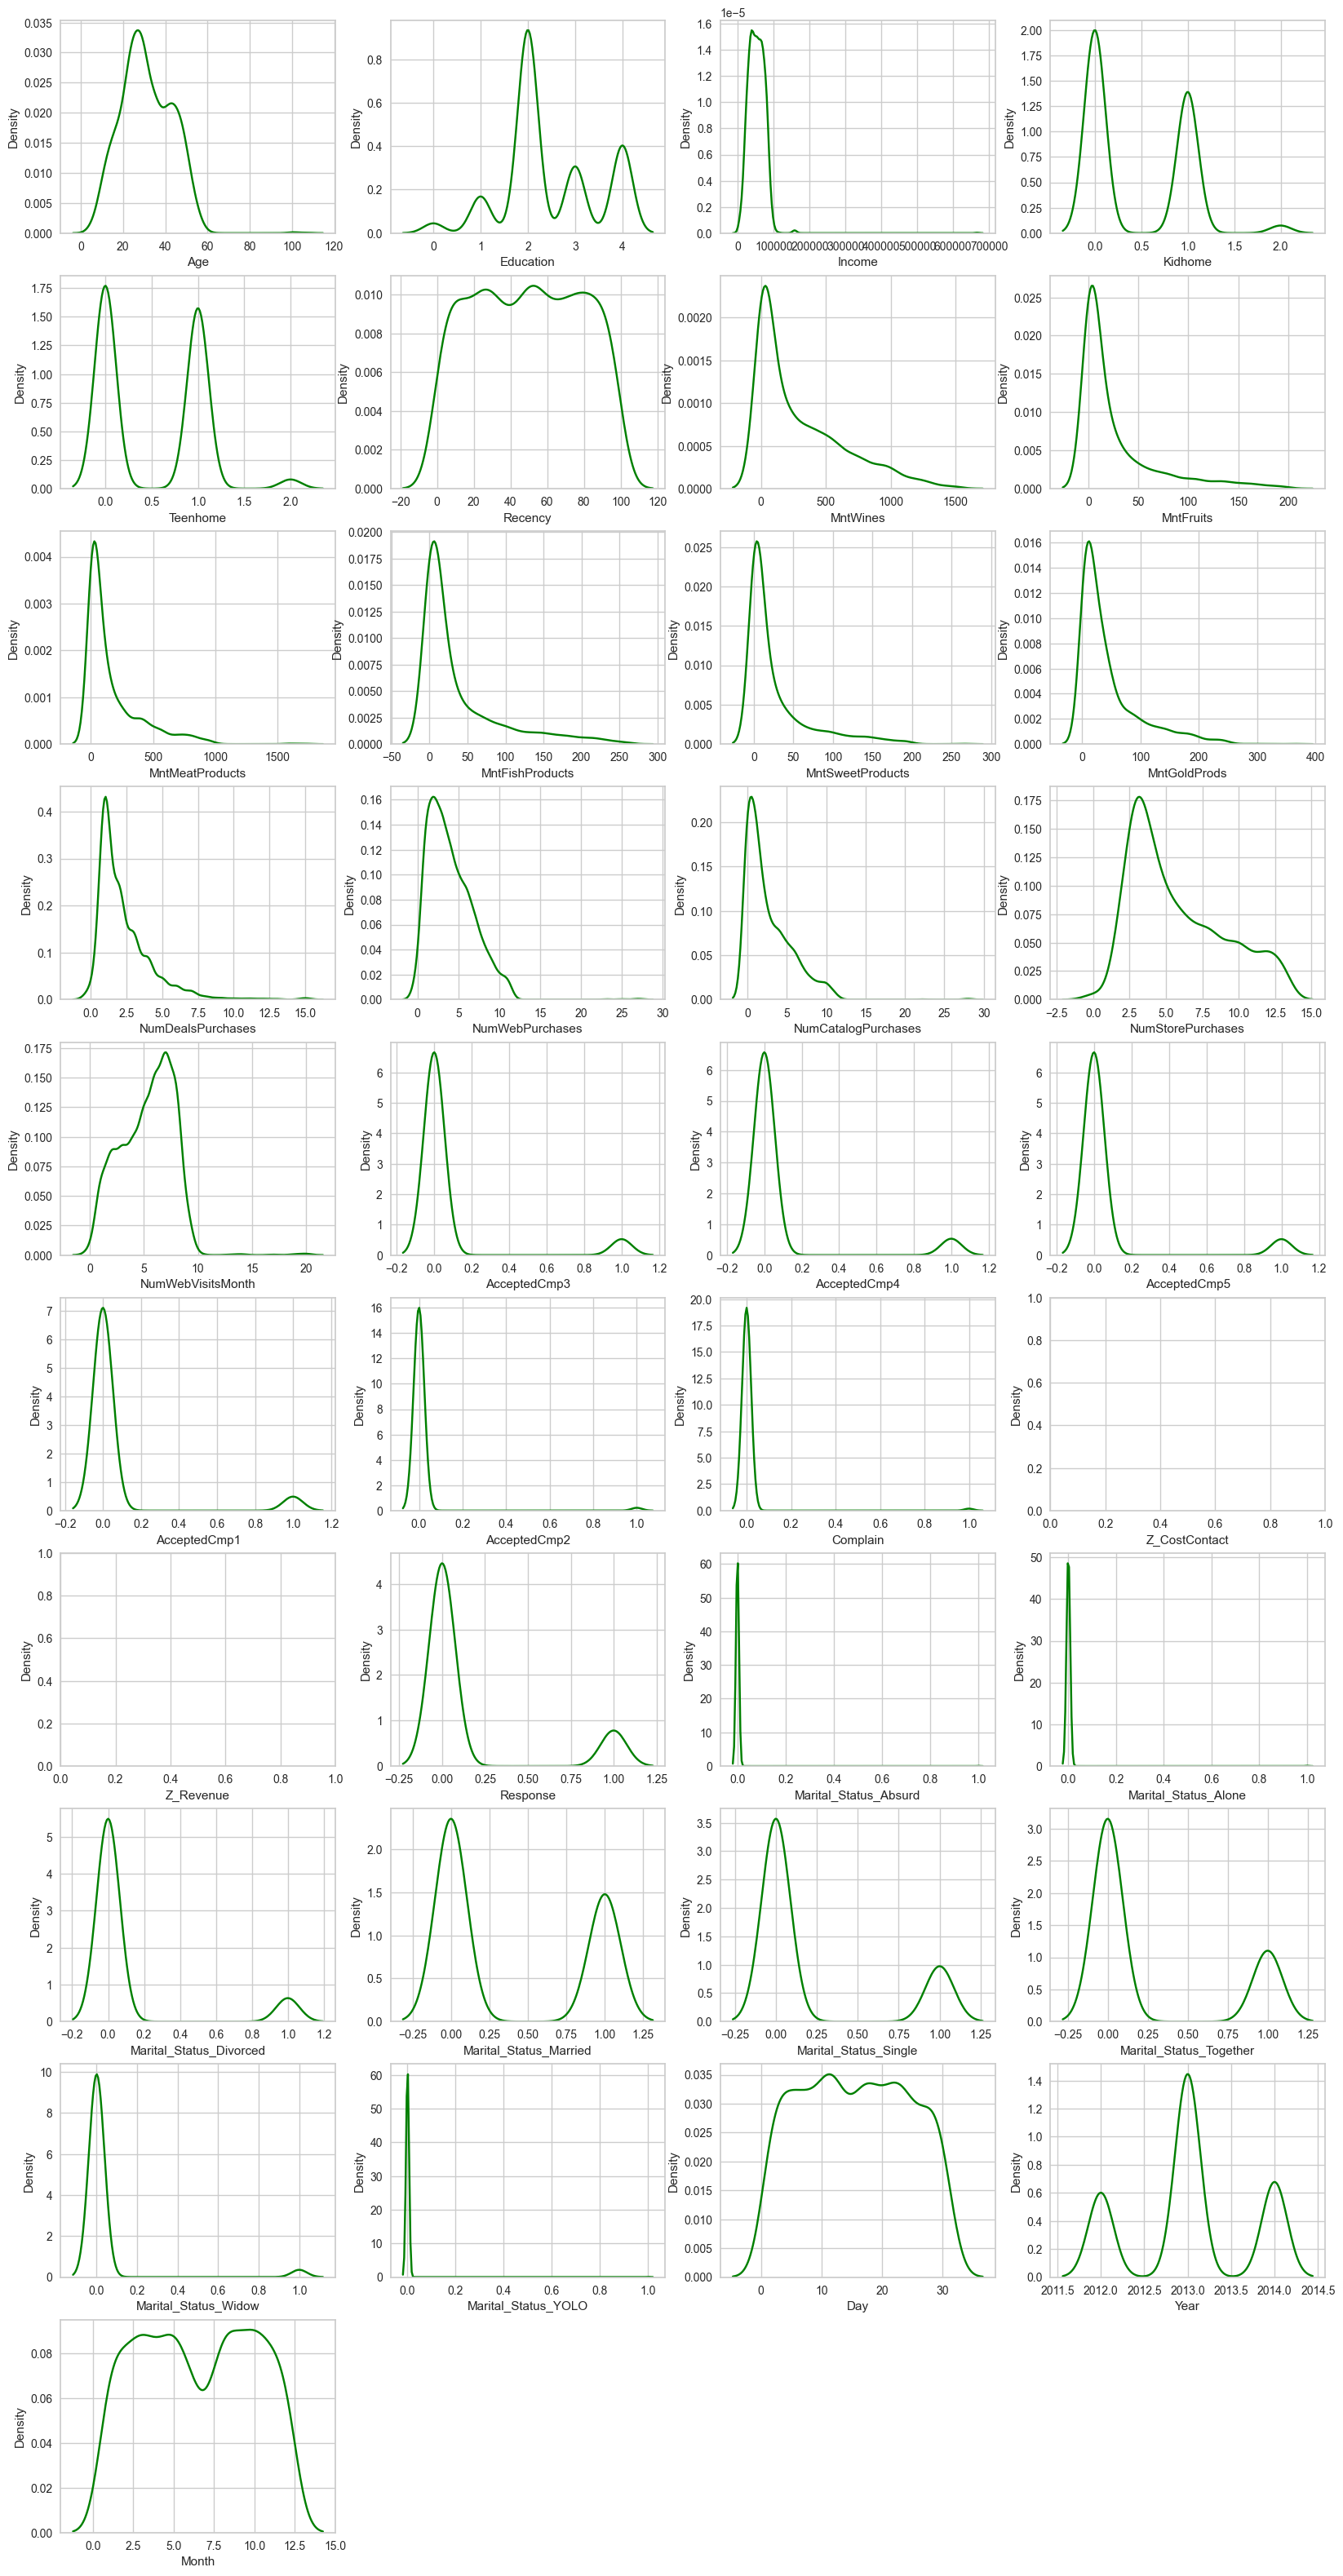

In [230]:
plt.figure(figsize=(20,40))
i=1
for col in df1.columns:
    plt.subplot(10,4,i)
    sns.kdeplot(df1[col],color='Green',)
    i+=1

## Plot QQ-Plot

In [231]:
import scipy.stats as stats

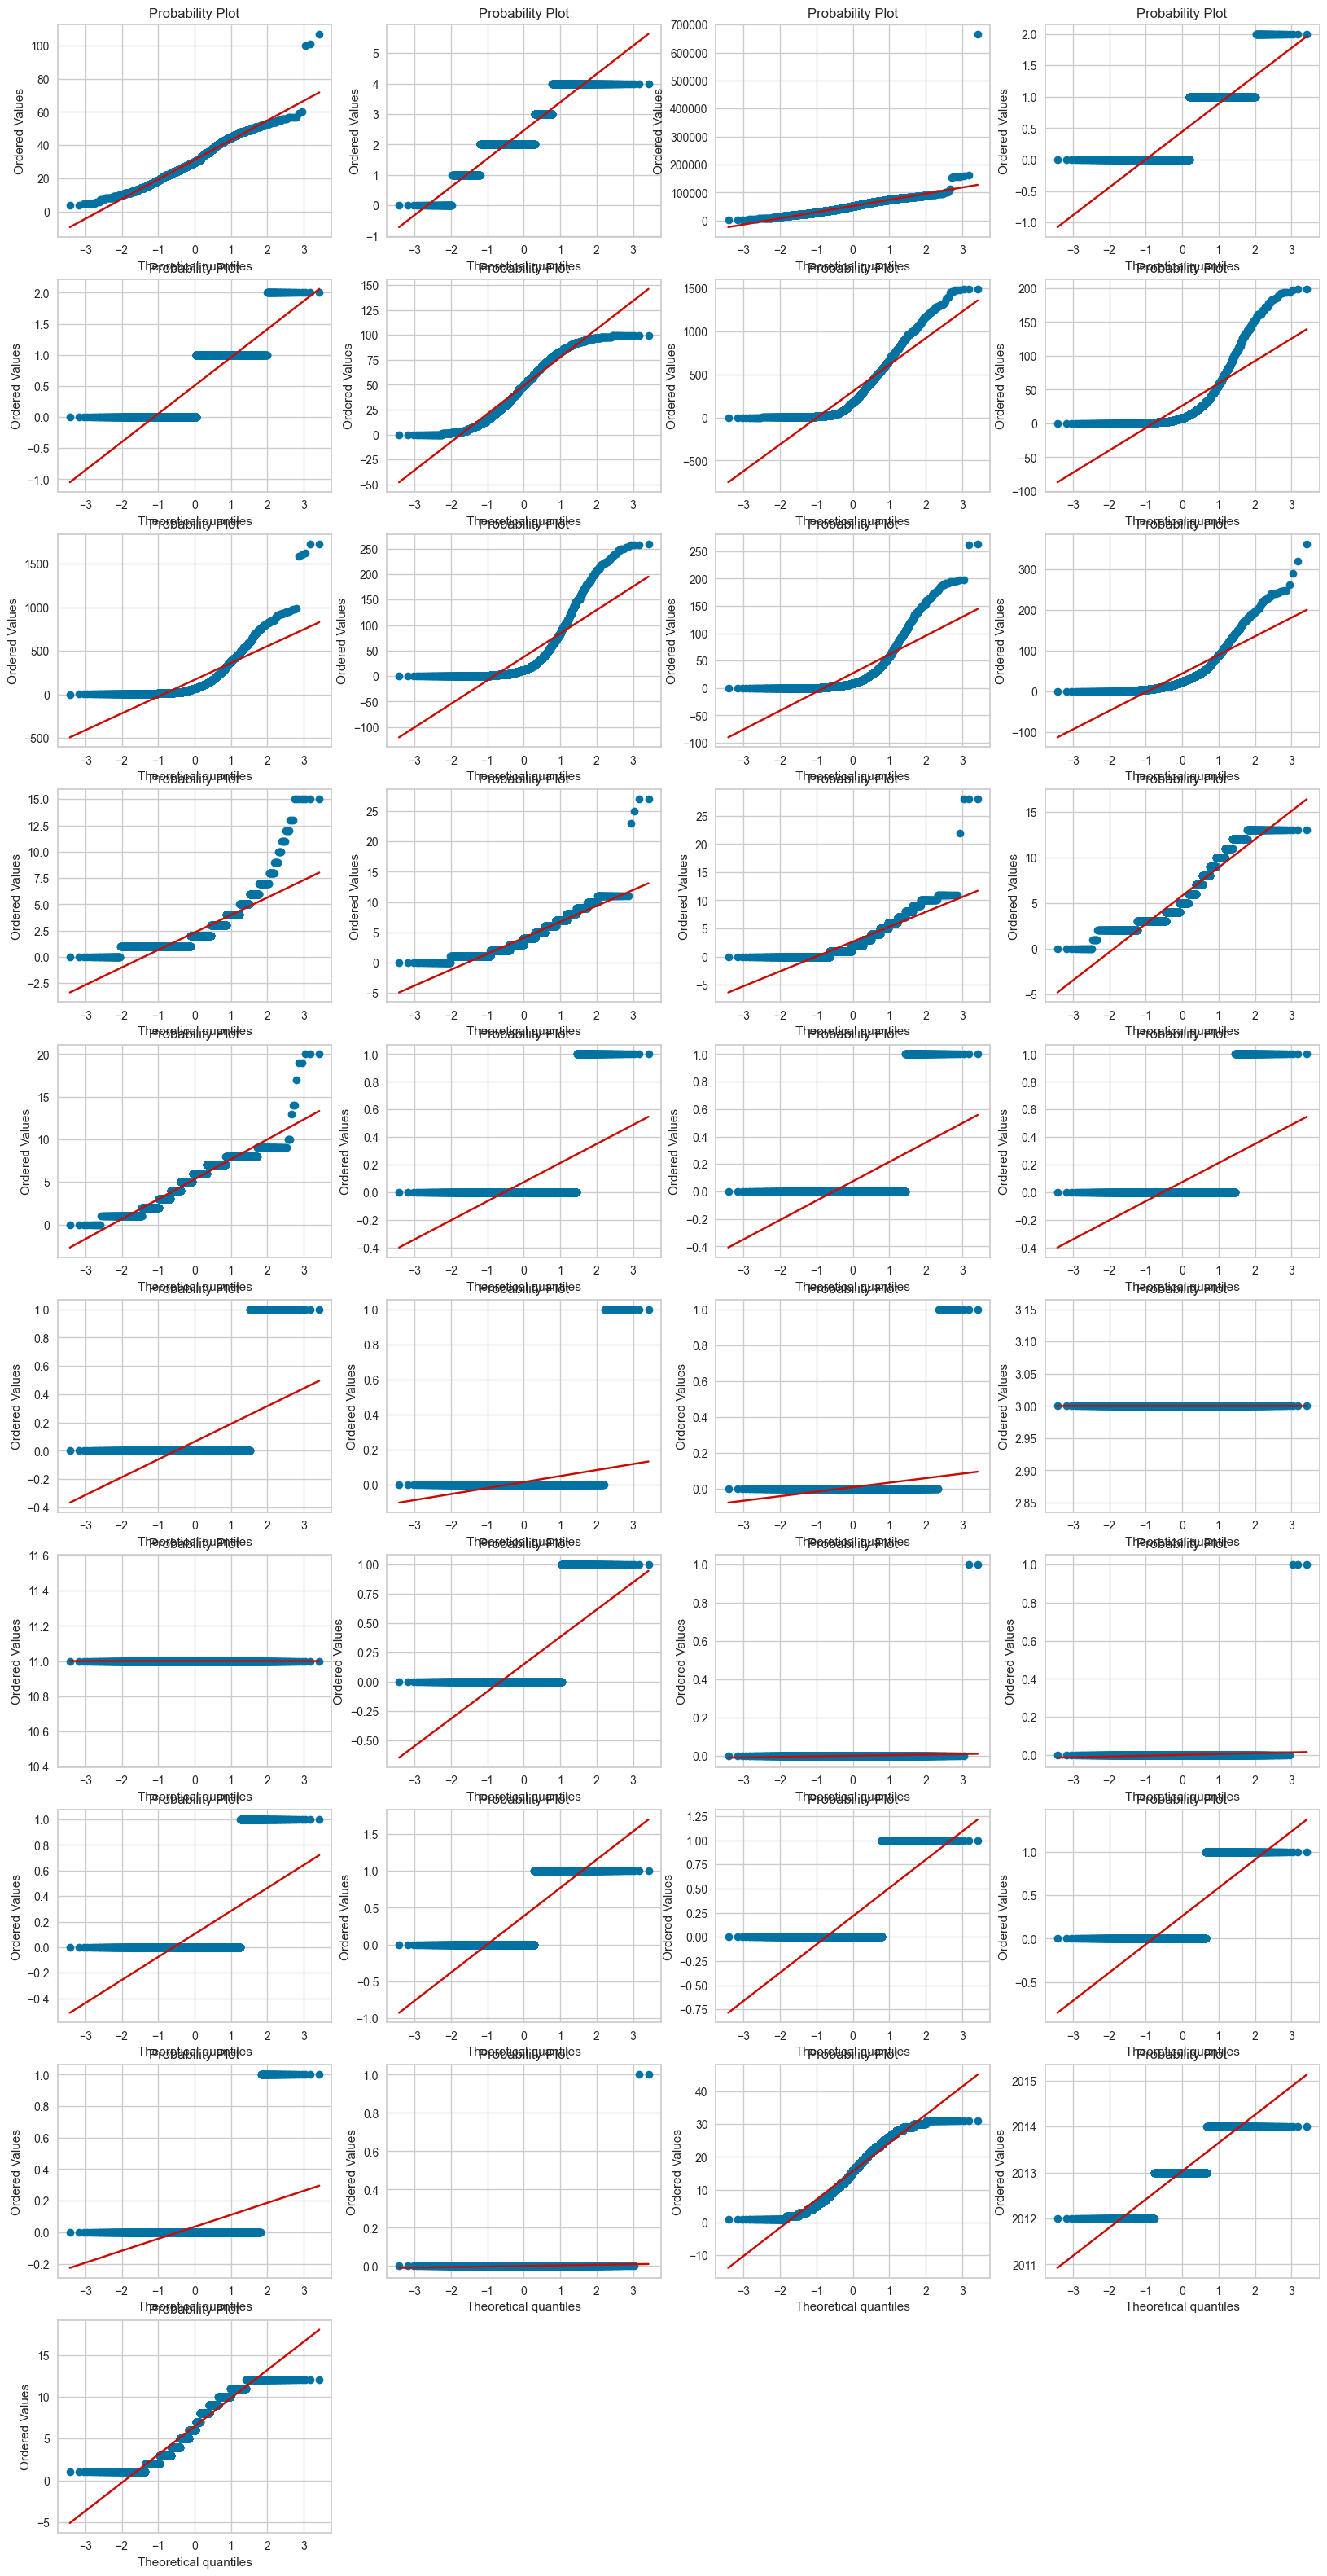

In [232]:
plt.figure(figsize=(20,40))
i=1
for col in df1.columns:
    plt.subplot(10,4,i)
    stats.probplot(df1[col], dist="norm", plot=plt) 
    i+=1

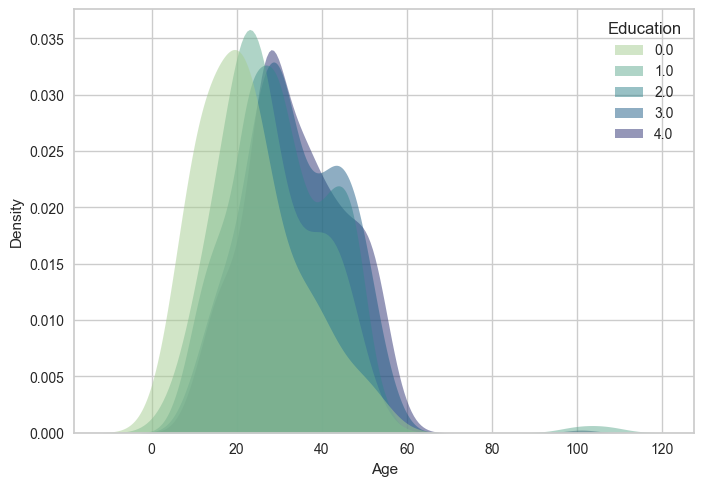

In [233]:
sns.kdeplot(
   data=df1, x='Age', hue="Education",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.show()

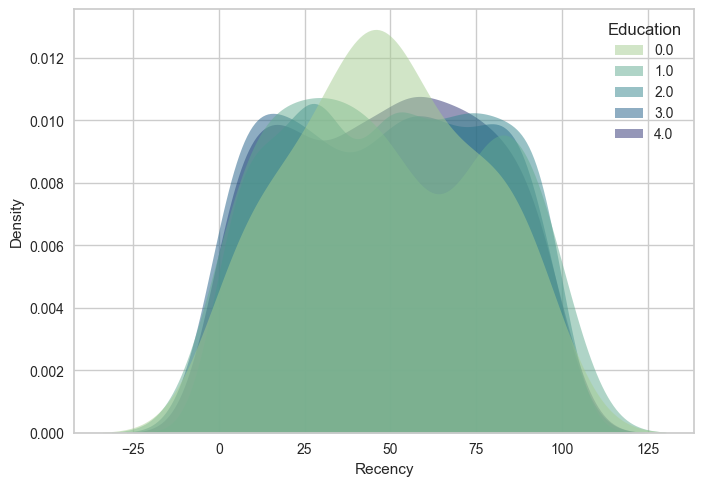

In [234]:
sns.kdeplot(
   data=df1, x='Recency', hue="Education",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.show()

## Outliers Detection

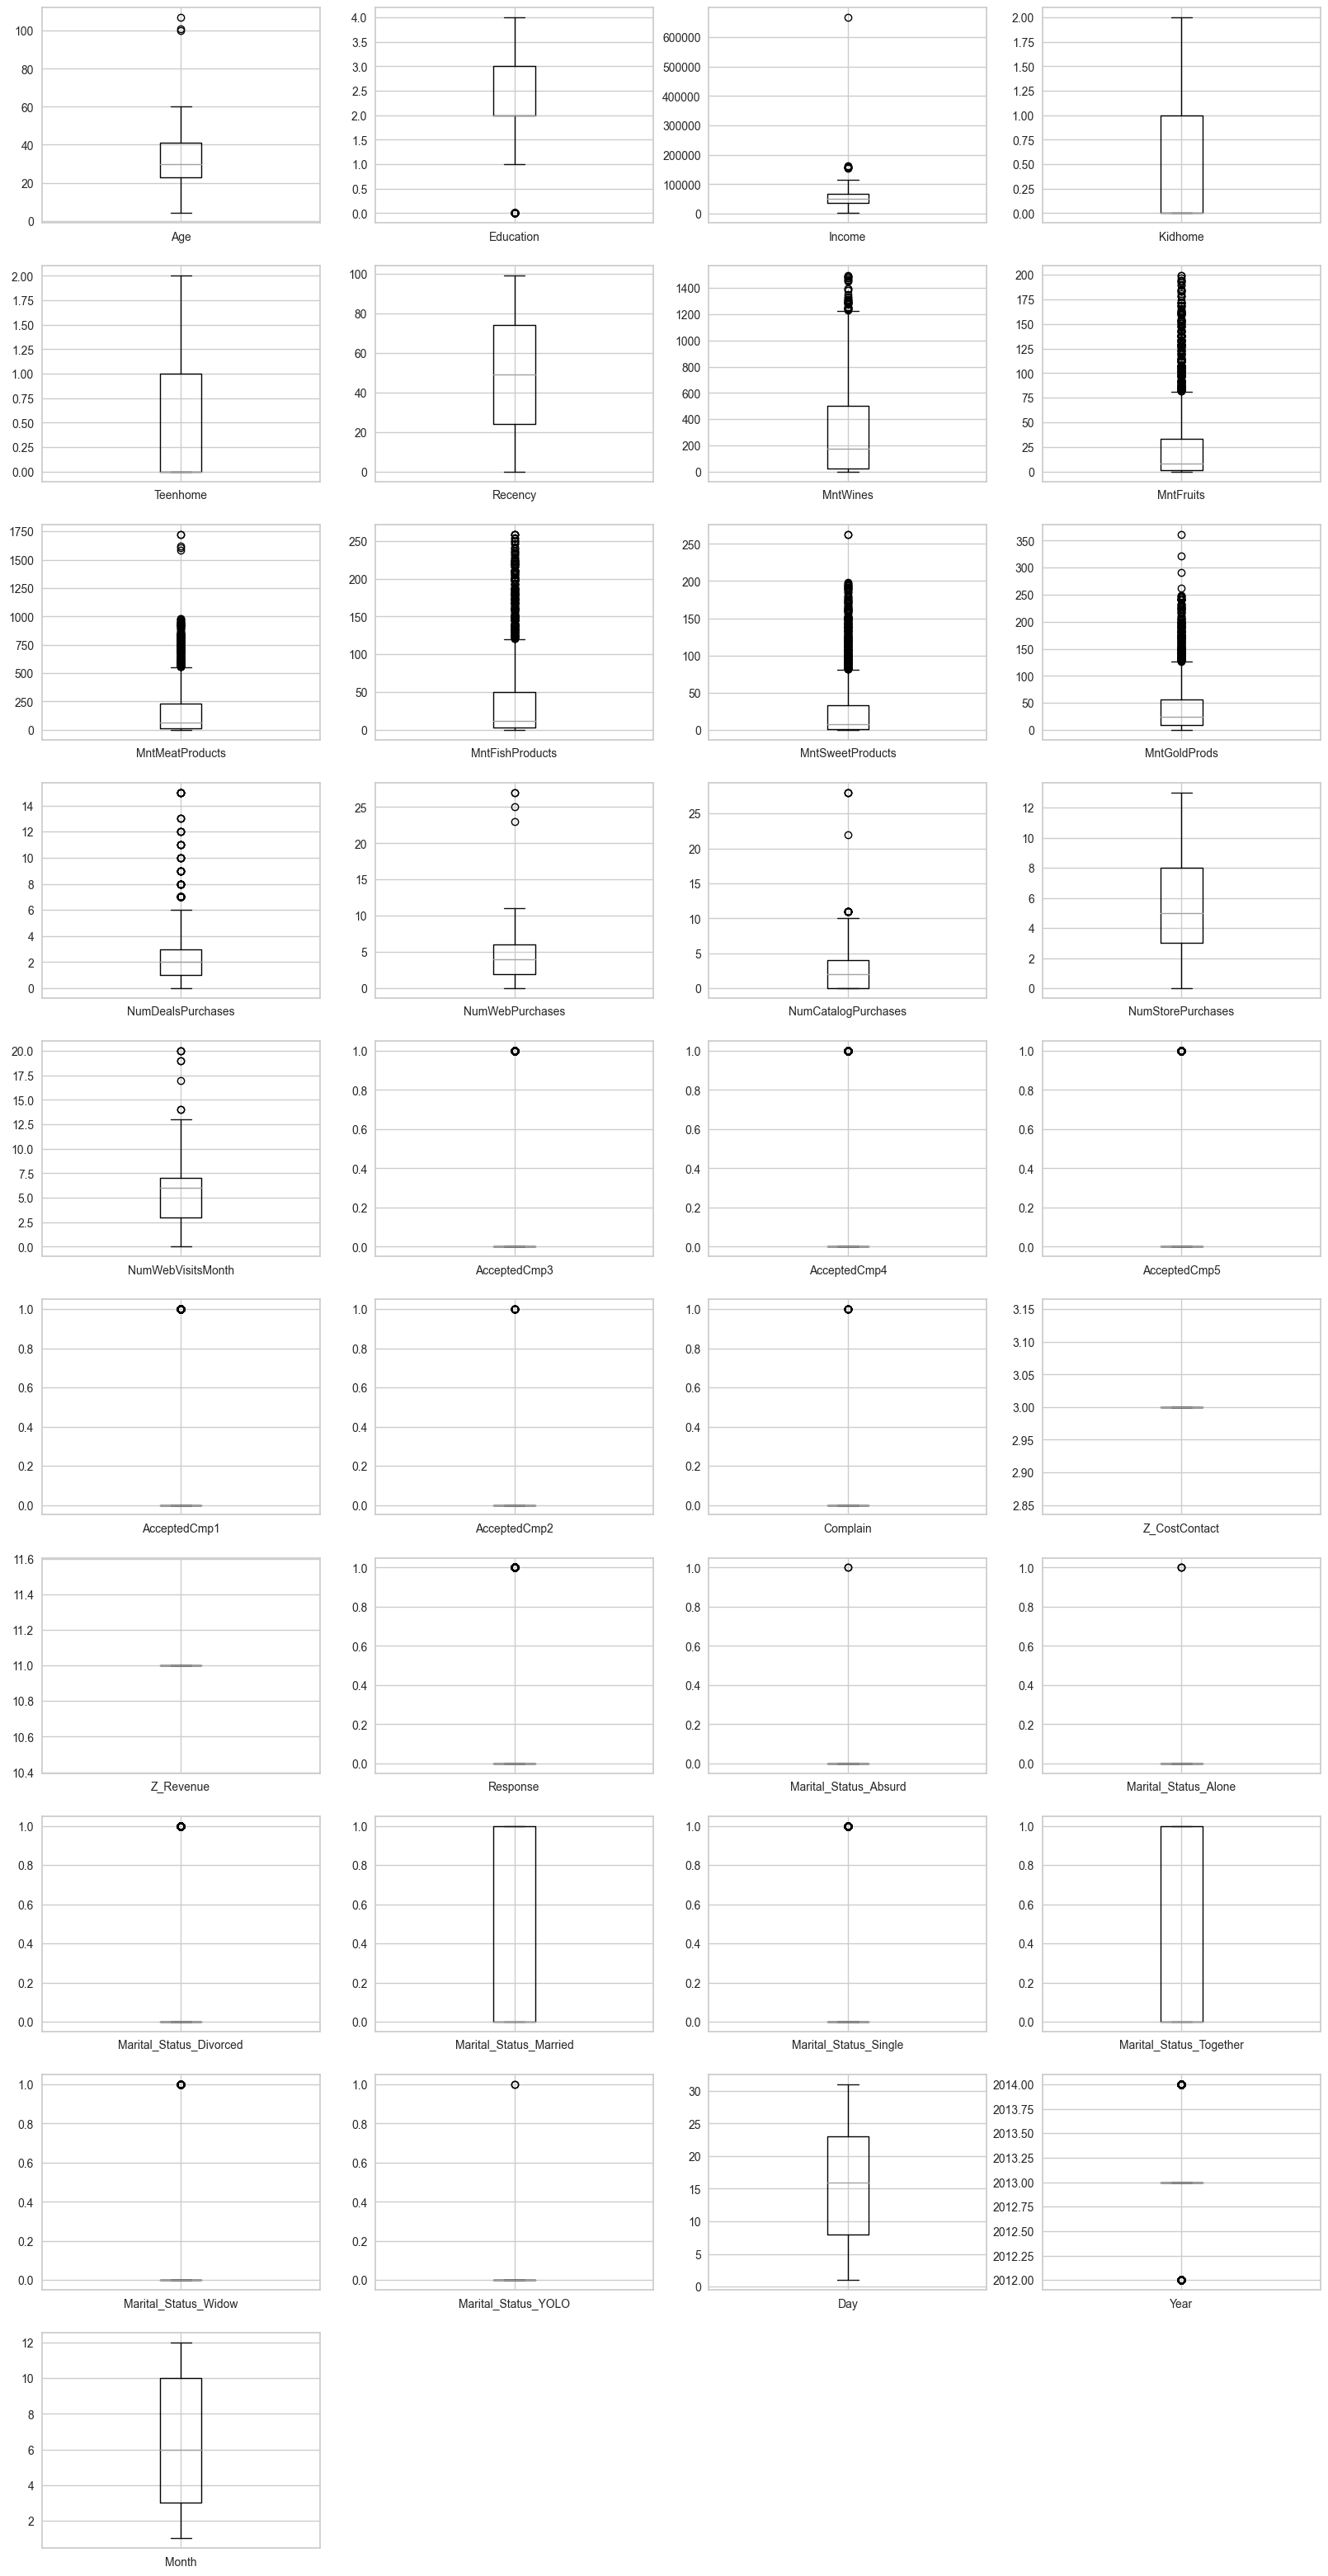

In [235]:
plt.figure(figsize=(20,40))
i=1
for col in df1.columns:
    plt.subplot(10,4,i)
    df1[[col]].boxplot()
    i+=1

In [236]:
df1.skew()

Age                         0.349944
Education                   0.126241
Income                      6.799965
Kidhome                     0.635288
Teenhome                    0.407115
Recency                    -0.001987
MntWines                    1.175771
MntFruits                   2.102063
MntMeatProducts             2.083233
MntFishProducts             1.919769
MntSweetProducts            2.136081
MntGoldProds                1.886106
NumDealsPurchases           2.418569
NumWebPurchases             1.382794
NumCatalogPurchases         1.880989
NumStorePurchases           0.702237
NumWebVisitsMonth           0.207926
AcceptedCmp3                3.291705
AcceptedCmp4                3.241574
AcceptedCmp5                3.291705
AcceptedCmp1                3.555444
AcceptedCmp2                8.472093
Complain                   10.188972
Z_CostContact               0.000000
Z_Revenue                   0.000000
Response                    1.971555
Marital_Status_Absurd      33.443963
M

## Handling Skewness in Each Features

In [237]:
for col in df1.columns:
    if df1[col].skew()>0.5:
        df1[col] = np.log1p(df1[col])
        
    elif df1[col].skew()<-0.5:
        df1[col] = np.sqrt(df1[col])

In [238]:
df1

,Age,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Day,Year,Month
0,43,2.0,10.970592,0.000000,0,58,6.455199,4.488636,6.304449,5.153292,...,0.0,0.000000,0,0.693147,0.000000,0.0,0.0,4,2012,9
1,46,2.0,10.743869,0.693147,1,38,2.484907,0.693147,1.945910,1.098612,...,0.0,0.000000,0,0.693147,0.000000,0.0,0.0,8,2014,3
2,35,2.0,11.179046,0.000000,0,26,6.056784,3.912023,4.852030,4.718499,...,0.0,0.000000,0,0.000000,0.693147,0.0,0.0,21,2013,8
3,16,2.0,10.190432,0.693147,0,26,2.484907,1.609438,3.044522,2.397895,...,0.0,0.000000,0,0.000000,0.693147,0.0,0.0,10,2014,2
4,19,4.0,10.973254,0.693147,0,94,5.159055,3.784190,4.779123,3.850148,...,0.0,0.000000,1,0.000000,0.000000,0.0,0.0,19,2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,33,2.0,11.022295,0.000000,1,46,6.565265,3.784190,5.209486,3.761200,...,0.0,0.000000,1,0.000000,0.000000,0.0,0.0,13,2013,6
2236,54,4.0,11.066873,1.098612,1,56,6.008813,0.000000,3.433987,0.000000,...,0.0,0.000000,0,0.000000,0.693147,0.0,0.0,10,2014,6
2237,19,2.0,10.950491,0.000000,0,91,6.812345,3.891820,5.384495,3.496508,...,0.0,0.693147,0,0.000000,0.000000,0.0,0.0,25,2014,1
2238,44,3.0,11.145421,0.000000,1,8,6.061457,3.433987,5.370638,4.394449,...,0.0,0.000000,0,0.000000,0.693147,0.0,0.0,24,2014,1


## After Handling Skewness Check Normal Distributions Data

In [239]:
# Skewness
df1.skew()

Age                         0.349944
Education                   0.126241
Income                     -1.180276
Kidhome                     0.418104
Teenhome                    0.407115
Recency                    -0.001987
MntWines                   -0.547198
MntFruits                   0.083858
MntMeatProducts            -0.082692
MntFishProducts            -0.052153
MntSweetProducts            0.085683
MntGoldProds               -0.341428
NumDealsPurchases           0.666507
NumWebPurchases            -0.264285
NumCatalogPurchases         0.132260
NumStorePurchases          -0.141956
NumWebVisitsMonth           0.207926
AcceptedCmp3                3.291705
AcceptedCmp4                3.241574
AcceptedCmp5                3.291705
AcceptedCmp1                3.555444
AcceptedCmp2                8.472093
Complain                   10.188972
Z_CostContact               0.000000
Z_Revenue                   0.000000
Response                    1.971555
Marital_Status_Absurd      33.443963
M

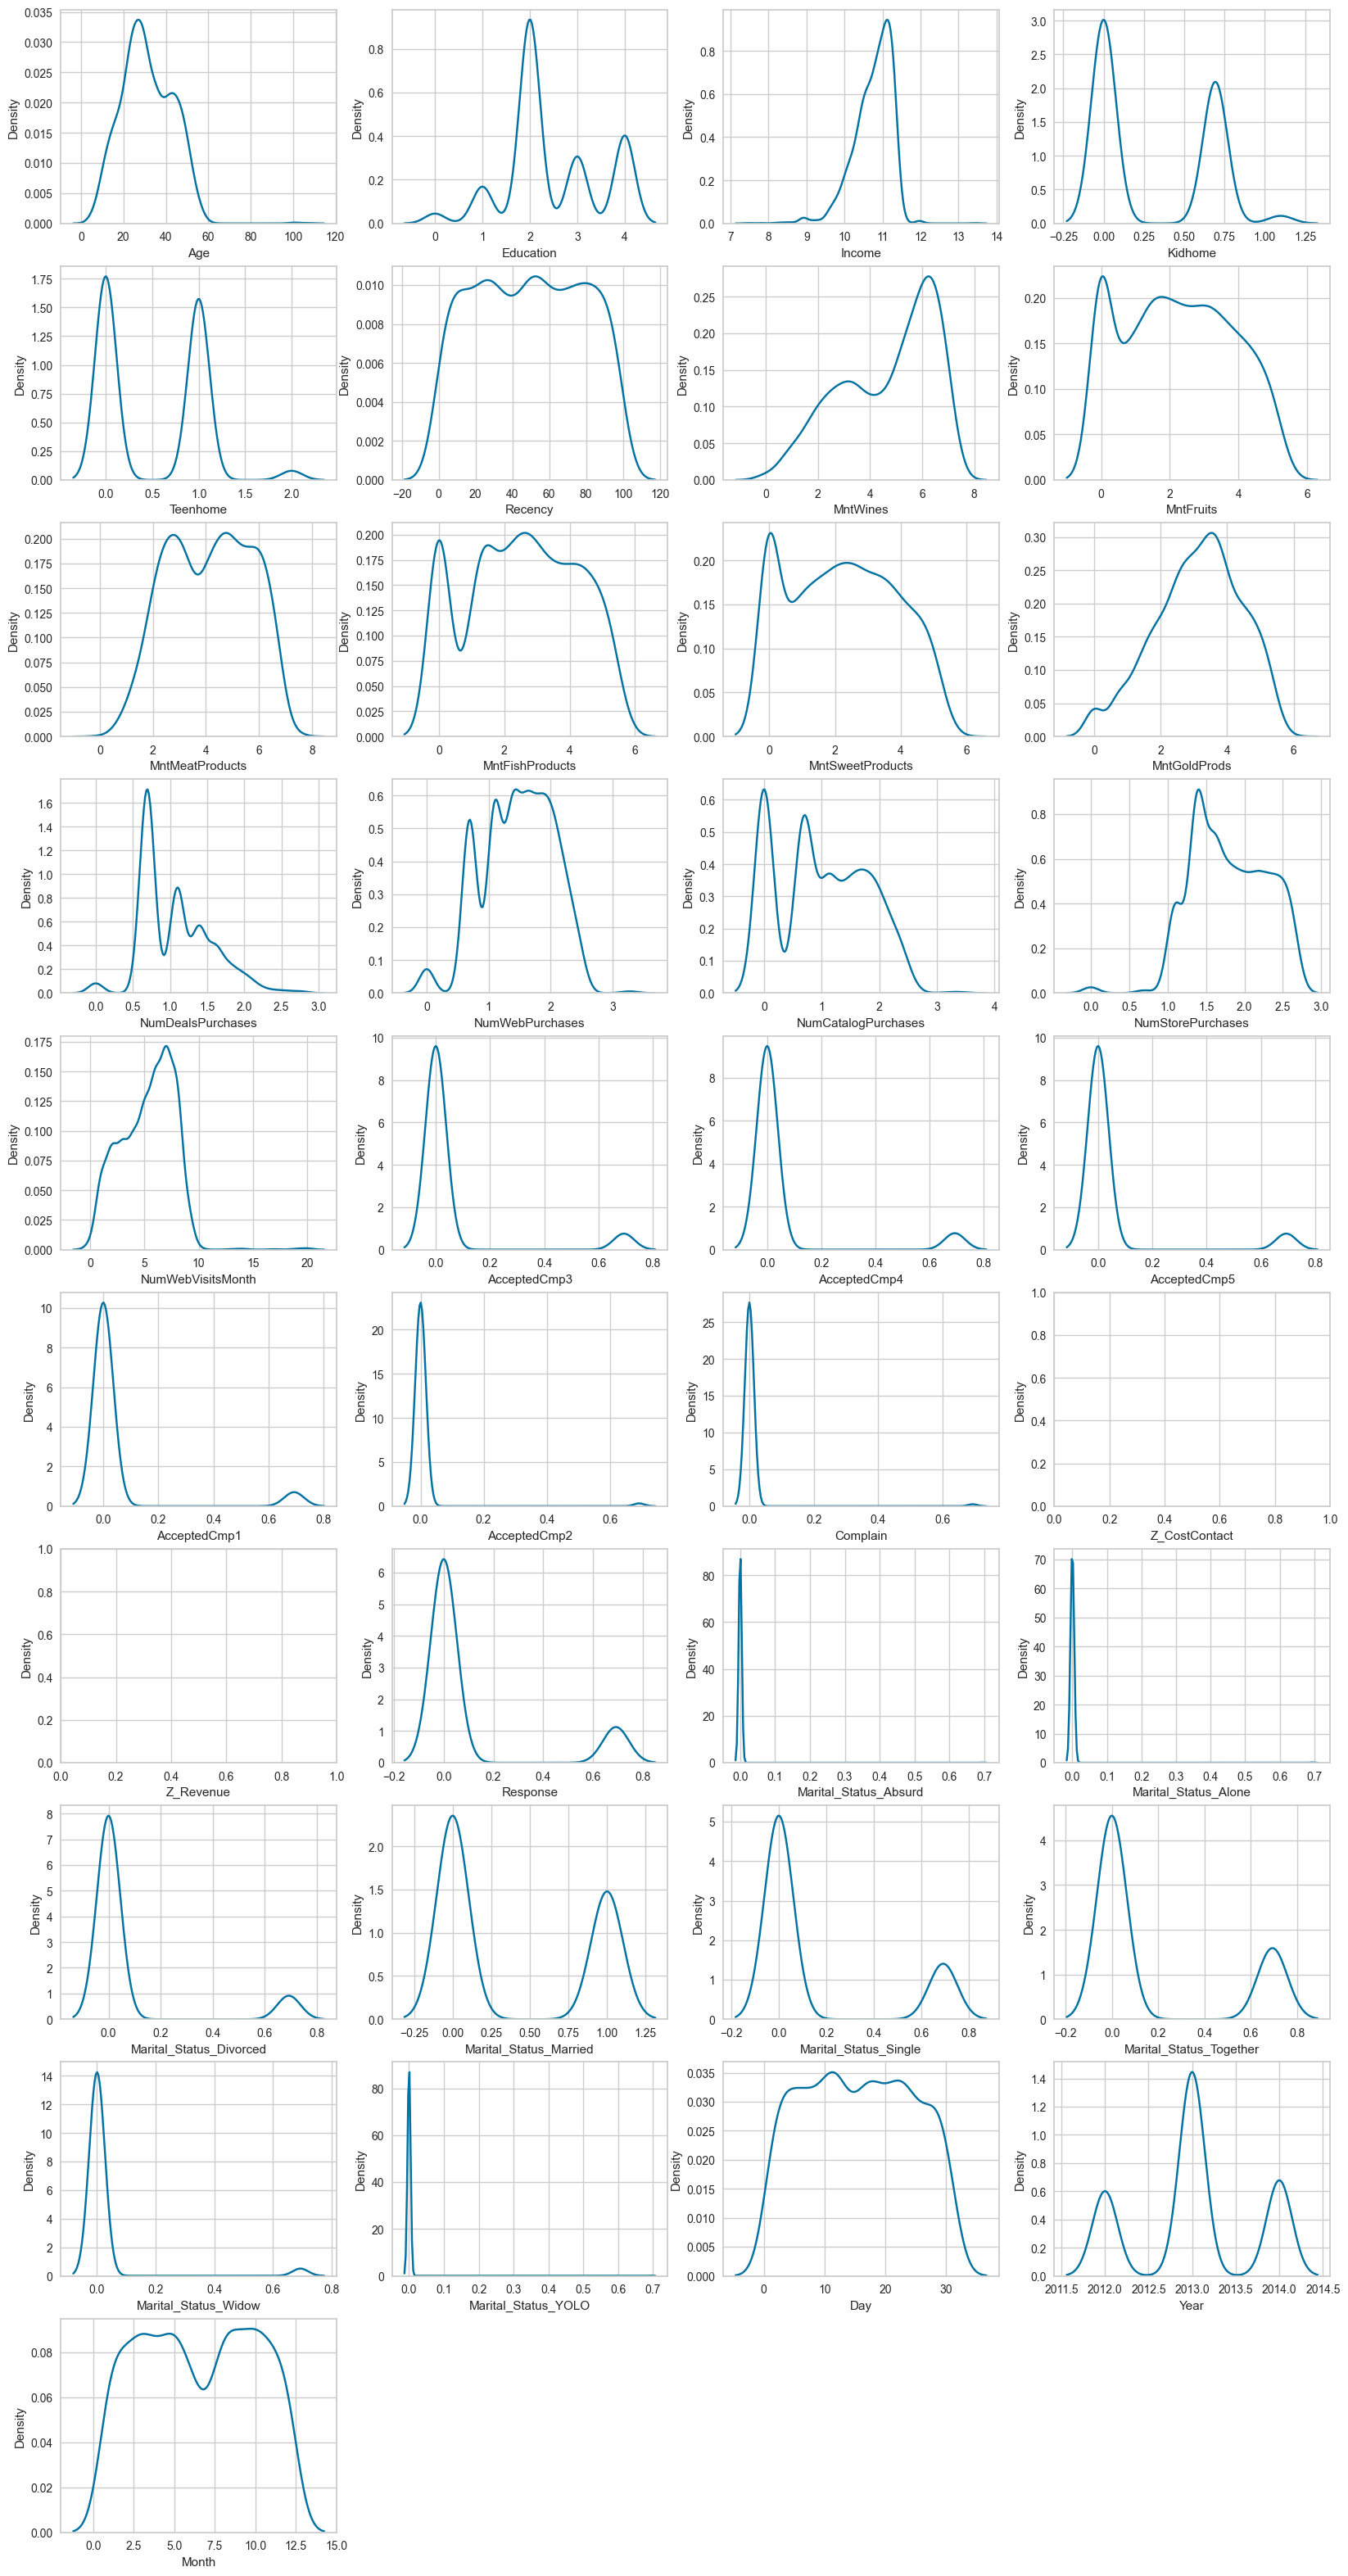

In [240]:
plt.figure(figsize=(20,40))
i=1
for col in df1.columns:
    plt.subplot(10,4,i)
    sns.kdeplot(df1[col])
    i+=1

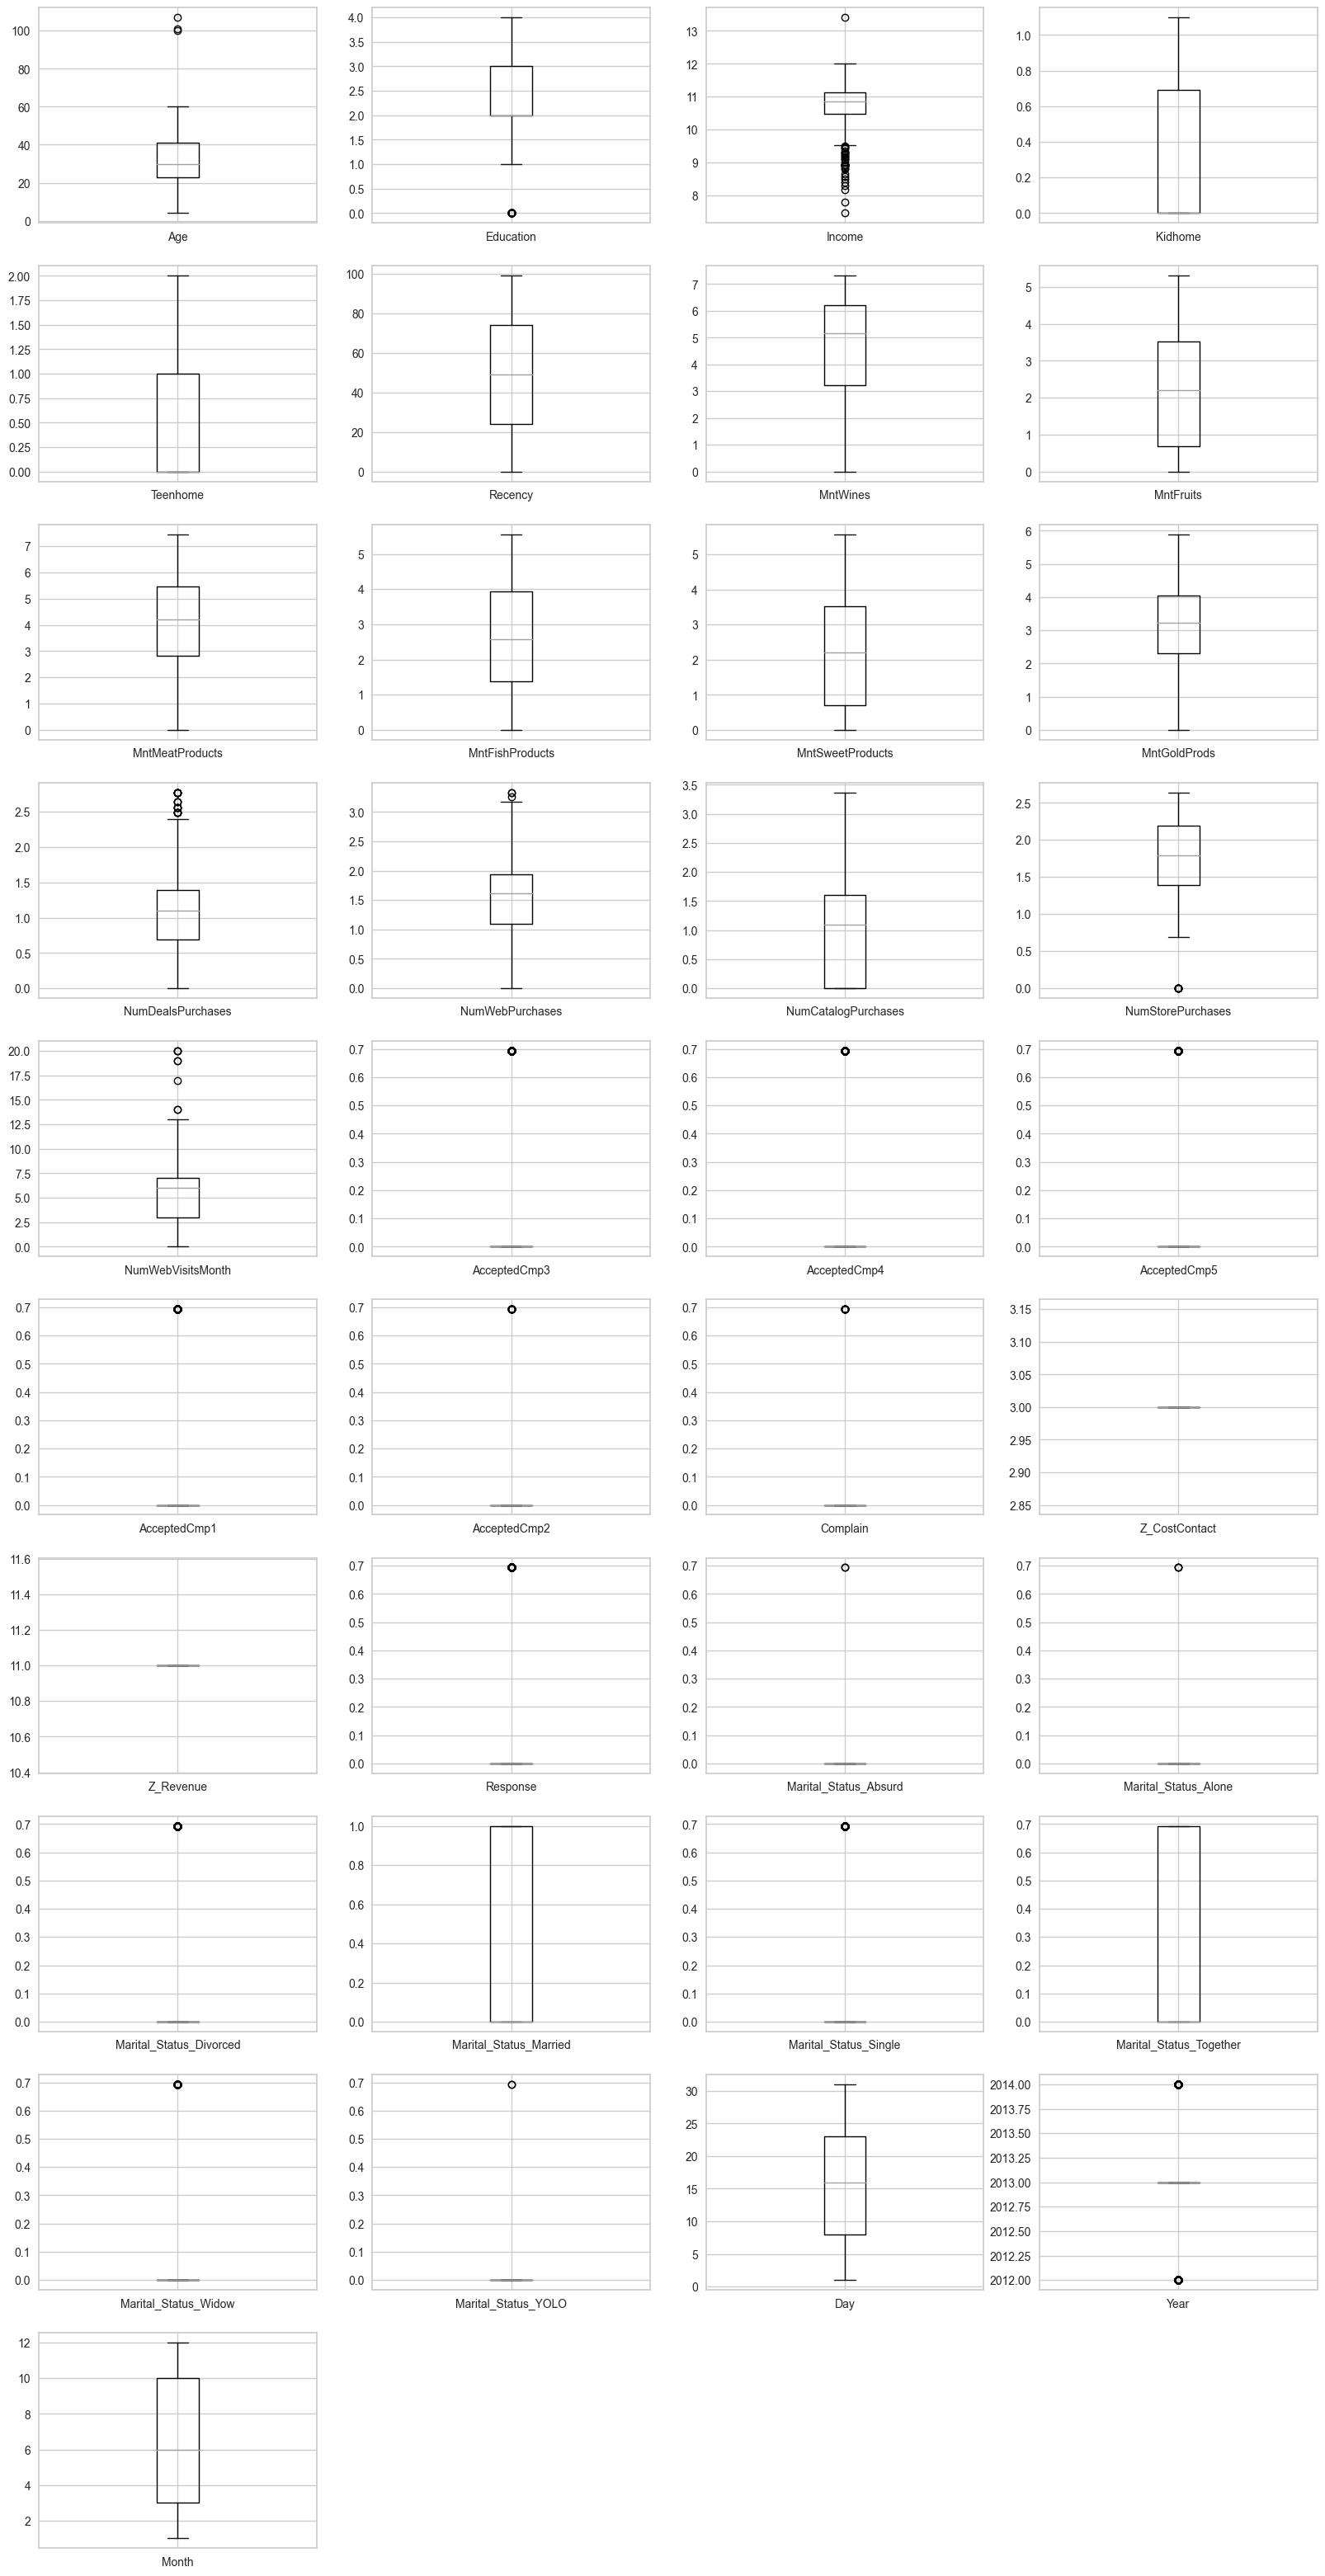

In [241]:
plt.figure(figsize=(20,40))
i=1
for col in df1.columns:
    plt.subplot(10,4,i)
    df1[[col]].boxplot()
    i+=1

In [242]:
df1.head()

,Age,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Day,Year,Month
0,43,2.0,10.970592,0.000000,0,58,6.455199,4.488636,6.304449,5.153292,...,0.0,0.0,0,0.693147,0.000000,0.0,0.0,4,2012,9
1,46,2.0,10.743869,0.693147,1,38,2.484907,0.693147,1.945910,1.098612,...,0.0,0.0,0,0.693147,0.000000,0.0,0.0,8,2014,3
2,35,2.0,11.179046,0.000000,0,26,6.056784,3.912023,4.852030,4.718499,...,0.0,0.0,0,0.000000,0.693147,0.0,0.0,21,2013,8
3,16,2.0,10.190432,0.693147,0,26,2.484907,1.609438,3.044522,2.397895,...,0.0,0.0,0,0.000000,0.693147,0.0,0.0,10,2014,2
4,19,4.0,10.973254,0.693147,0,94,5.159055,3.784190,4.779123,3.850148,...,0.0,0.0,1,0.000000,0.000000,0.0,0.0,19,2014,1


## Scale The Data

In [243]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df1)
df1_scaled = pd.DataFrame(scaled_data,columns=df1.columns)
df1_scaled

,Age,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Day,Year,Month
0,0.378641,0.50,0.590255,0.00000,0.0,0.585859,0.883159,0.847181,0.845830,0.926737,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.100000,0.0,0.727273
1,0.407767,0.50,0.552173,0.63093,0.5,0.383838,0.339969,0.130824,0.261071,0.197568,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.233333,1.0,0.181818
2,0.300971,0.50,0.625268,0.00000,0.0,0.262626,0.828651,0.738352,0.650968,0.848547,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.666667,0.5,0.636364
3,0.116505,0.50,0.459215,0.63093,0.0,0.262626,0.339969,0.303764,0.408465,0.431223,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.300000,1.0,0.090909
4,0.145631,1.00,0.590702,0.63093,0.0,0.949495,0.705829,0.714225,0.641187,0.692388,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.600000,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.281553,0.50,0.598939,0.00000,0.5,0.464646,0.898218,0.714225,0.698926,0.676392,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.400000,0.5,0.454545
2236,0.485437,1.00,0.606427,1.00000,0.5,0.565657,0.822088,0.000000,0.460718,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.300000,1.0,0.454545
2237,0.145631,0.50,0.586879,0.00000,0.0,0.919192,0.932022,0.734539,0.722406,0.628791,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.800000,1.0,0.000000
2238,0.388350,0.75,0.619620,0.00000,0.5,0.080808,0.829290,0.648128,0.720547,0.790272,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.766667,1.0,0.000000


In [244]:
df1.isna().sum()

Age                        0
Education                  0
Income                     0
Kidhome                    0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Response                   0
Marital_Status_Absurd      0
Marital_Status_Alone       0
Marital_Status_Divorced    0
Marital_Status_Married     0
Marital_Status_Single      0
Marital_Status_Together    0
Marital_Status_Widow       0
Marital_Status_YOLO        0
Day           

TRAINING DATA AND TESTING DATA

In [245]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# martial status di code percobaan di pisah menjadi 7 dan kolomnya menjadi 36 kolom

X=df1_scaled.loc[:, ['Age', 'Education', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'Day', 'Year', 'Month']]
y = df1_scaled.loc[:,['Response']]
# data traning 80%

train_X, test_X, train_y,test_y = train_test_split(X,y, test_size = 0.2)

RandomForestClassifier()

Random Forest

In [ ]:
forest = RandomForestClassifier()
forest.fit(train_X,train_y)

RandomForestClassifier()

In [ ]:
forest.score(test_X,test_y)

0.9462647444298821

In [ ]:
importance = dict(zip(forest.feature_names_in_,forest.feature_importances_))
importance = {k: v for k,v in sorted(importance.items(), key=lambda x:x[1], reverse = True)}
importance

{'Recency': 0.10011930738163273,
 'Year': 0.07457153004002852,
 'NumCatalogPurchases': 0.0713064083474216,
 'NumWebVisitsMonth': 0.05278351213390319,
 'Teenhome': 0.05253929035854729,
 'AcceptedCmp5': 0.04741208509289973,
 'MntMeatProducts': 0.04531213980240459,
 'MntGoldProds': 0.04459232729636167,
 'NumWebPurchases': 0.04265352836706414,
 'Education': 0.03984913814428057,
 'NumStorePurchases': 0.039756224249553586,
 'Income': 0.03771800744650763,
 'MntWines': 0.03298185267278871,
 'Month': 0.03154610723196102,
 'MntFruits': 0.030741574335847826,
 'MntSweetProducts': 0.030682353744373118,
 'AcceptedCmp1': 0.029597948700335518,
 'NumDealsPurchases': 0.029173291919239425,
 'Age': 0.028009689624282616,
 'MntFishProducts': 0.02800310508865468,
 'Day': 0.026977274011981512,
 'AcceptedCmp3': 0.025248215253547812,
 'Kidhome': 0.012110016497625517,
 'Marital_Status_Single': 0.009704703761120361,
 'Marital_Status_Married': 0.009014739224337194,
 'AcceptedCmp4': 0.008787181321459052,
 'Marital_

In [ ]:
#Perform hyperparameter tuning on the training set and fit the random forest model with the best found combinations.
from sklearn.model_selection import GridSearchCV


param_grid= {
    # banyanya tree dalam random forest
    'n_estimators': [50,100,250], 
    # kedalaman tiap tree dalam random forest
    'max_depth': [5,10,30,None],
    'min_samples_split': [2,4,8],
    'max_features': ['sqrt','log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid, verbose=10)


TRAIN THE MODEL

In [ ]:
# Train the model
# Create an instance of RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Fit the classifier to your training data
rf_classifier.fit(train_X, train_y)

# Predict using the same instance
y_pred = rf_classifier.predict(test_X)



EVALUATE THE PERFORMANCE

In [ ]:

# Assuming y_pred and test_y are already defined
accuracy = accuracy_score(test_y, y_pred)
print("Accuracy: ", accuracy)
print("Classification Report:\n", classification_report(test_y, y_pred))
cm = confusion_matrix(test_y, y_pred)

Accuracy:  0.9462647444298821
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       381
         1.0       0.95      0.94      0.95       382

    accuracy                           0.95       763
   macro avg       0.95      0.95      0.95       763
weighted avg       0.95      0.95      0.95       763



DISPLAY THE CONFUSION MATRIX AS A HEATMAP

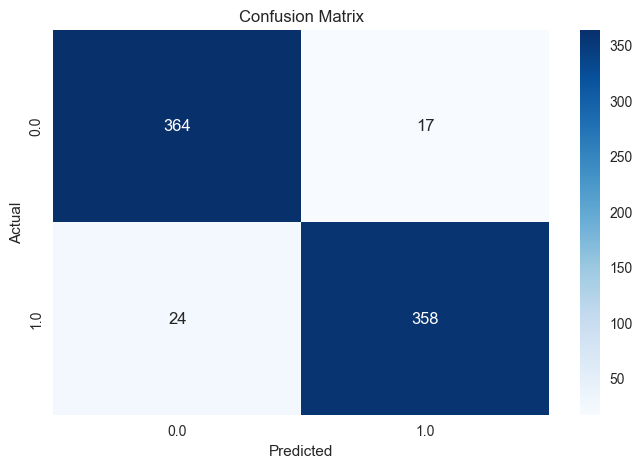

In [ ]:
plt.figure(figsize=(8, 5))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

KNN WITHOUT SMOTE

In [246]:
train_X, test_X, train_y,test_y = train_test_split(X,y, test_size = 0.2)

In [247]:
from sklearn import metrics


def plot_confusion_matrix(y_test, y_prediction):
    cm = metrics.confusion_matrix(y_test, y_prediction)
    ax = plt.subplot()
    ax = sns.heatmap(cm, annot=True, fmt='', cmap="Greens")
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Dont Had Stroke', 'Had Stroke'])
    ax.yaxis.set_ticklabels(['Dont Had Stroke', 'Had Stroke']) 
    plt.show()

In [248]:
def plot_learning_curve(X, y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(estimator=estimator, X=X, y=y, cv=5, n_jobs=1, train_sizes=np.linspace(.1, 1, num_trainings))
    print(np.linspace(.1,1, num_trainings))
    print(train_sizes)
    print(train_scores)
    print(test_scores)

    train_scores_mean = np.mean(train_scores, axis = 1)
    print(train_scores_mean)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    
    plt.figure(figsize = (15,10))
    plt.grid()
    plt.title('Learning Curves')
    plt.xlabel('Training examples')
    plt.ylabel('Score')

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = .1, color = 'g')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = .1, color = 'r')

    plt.plot(train_sizes, train_scores_mean, 'o-', color = 'g', label = 'Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color = 'y', label = 'Cross-validation score')
    plt.legend(loc = 'best')
    plt.show()

CLASSIFIER

In [249]:
# Assuming X is your DataFrame with 2240 rows
# Re-run your model and predictions on X
model = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(test_X)
preds = model.predict(test_X)

# Create a new DataFrame for segmented customers
segmented_customers = test_X.copy()

# Set the index of segmented_customers to match the index of X
segmented_customers.reset_index(drop=True, inplace=True)

# Assign the cluster labels to the new DataFrame
segmented_customers['clusters'] = preds

In [250]:
# Assuming y_pred and test_y are already defined
accuracy = accuracy_score(test_y, preds)
print("Accuracy: ", accuracy)
print("Classification Report:\n", classification_report(test_y, preds))
cm = confusion_matrix(test_y, preds)

Accuracy:  0.23883928571428573
Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.26      0.38       381
         1.0       0.08      0.13      0.10        67
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0

    accuracy                           0.24       448
   macro avg       0.21      0.10      0.12       448
weighted avg       0.66      0.24      0.34       448



KNN APPLYING SMOTE

In [251]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)
train_X, test_X, train_y,test_y = train_test_split(X,y, test_size = 0.2)

In [252]:
from sklearn import metrics


def plot_confusion_matrix(y_test, y_prediction):
    cm = metrics.confusion_matrix(y_test, y_prediction)
    ax = plt.subplot()
    ax = sns.heatmap(cm, annot=True, fmt='', cmap="Greens")
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Dont Had Stroke', 'Had Stroke'])
    ax.yaxis.set_ticklabels(['Dont Had Stroke', 'Had Stroke']) 
    plt.show()

In [253]:
def plot_learning_curve(X, y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(estimator=estimator, X=X, y=y, cv=5, n_jobs=1, train_sizes=np.linspace(.1, 1, num_trainings))
    print(np.linspace(.1,1, num_trainings))
    print(train_sizes)
    print(train_scores)
    print(test_scores)

    train_scores_mean = np.mean(train_scores, axis = 1)
    print(train_scores_mean)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    
    plt.figure(figsize = (15,10))
    plt.grid()
    plt.title('Learning Curves')
    plt.xlabel('Training examples')
    plt.ylabel('Score')

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = .1, color = 'g')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = .1, color = 'r')

    plt.plot(train_sizes, train_scores_mean, 'o-', color = 'g', label = 'Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color = 'y', label = 'Cross-validation score')
    plt.legend(loc = 'best')
    plt.show()

CLASSIFIER

In [254]:
# Assuming X is your DataFrame with 2240 rows
# Re-run your model and predictions on X
model = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(test_X)
preds = model.predict(test_X)

# Create a new DataFrame for segmented customers
segmented_customers = test_X.copy()

# Set the index of segmented_customers to match the index of X
segmented_customers.reset_index(drop=True, inplace=True)

# Assign the cluster labels to the new DataFrame
segmented_customers['clusters'] = preds

In [255]:
# Assuming y_pred and test_y are already defined
accuracy = accuracy_score(test_y, preds)
print("Accuracy: ", accuracy)
print("Classification Report:\n", classification_report(test_y, preds))
cm = confusion_matrix(test_y, preds)

Accuracy:  0.1310615989515072
Classification Report:
               precision    recall  f1-score   support

         0.0       0.12      0.03      0.05       381
         1.0       0.41      0.23      0.29       382
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0

    accuracy                           0.13       763
   macro avg       0.13      0.07      0.09       763
weighted avg       0.27      0.13      0.17       763

